In [1]:
import pandas as pd
dataset=pd.read_csv("new_heart.csv")
dataset
import seaborn as sns

In [2]:
dataset.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
dataset.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  302 non-null    int64  
 1   age         302 non-null    int64  
 2   sex         302 non-null    int64  
 3   cp          302 non-null    int64  
 4   trestbps    302 non-null    int64  
 5   chol        302 non-null    int64  
 6   fbs         302 non-null    int64  
 7   restecg     302 non-null    int64  
 8   thalach     302 non-null    int64  
 9   exang       302 non-null    int64  
 10  oldpeak     302 non-null    float64
 11  slope       302 non-null    int64  
 12  ca          302 non-null    int64  
 13  thal        302 non-null    int64  
 14  target      302 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.5 KB


In [5]:
import pandas as pd

# Define the numeric columns
numeric_col = [ 'age','cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create an empty DataFrame with row indices and column names
descriptive = pd.DataFrame(index=[
   # "Mean", "Median", "Mode", 
    "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", 
    "IQR", "1.5rule", "Lesser", "Greater", "Min", "Max", 
    #"Variance", 
    #"Standard Deviation", "Skew", "Kurtosis"
], columns=numeric_col)

# Populate the descriptive DataFrame
for columnName in numeric_col:
    #descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    #descriptive.loc["Median", columnName] = dataset[columnName].median()
    #descriptive.loc["Mode", columnName] = dataset[columnName].mode()[0] if not dataset[columnName].mode().empty else None
    descriptive.loc["Q1:25%", columnName] = dataset[columnName].quantile(0.25)
    descriptive.loc["Q2:50%", columnName] = dataset[columnName].quantile(0.50)
    descriptive.loc["Q3:75%", columnName] = dataset[columnName].quantile(0.75)
    descriptive.loc["Q4:100%", columnName] = dataset[columnName].max()
    descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
    descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["IQR", columnName]
    descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["IQR", columnName]
    descriptive.loc["Min", columnName] = dataset[columnName].min()
    descriptive.loc["Max", columnName] = dataset[columnName].max()
    #descriptive.loc["Variance", columnName] = dataset[columnName].var()
    #descriptive.loc["Standard Deviation", columnName] = dataset[columnName].std()
    #descriptive.loc["Skew", columnName] = dataset[columnName].skew()
    #descriptive.loc["Kurtosis", columnName] = dataset[columnName].kurtosis()

# Convert DataFrame values to numeric (to avoid type errors)
descriptive = descriptive.apply(pd.to_numeric, errors='coerce')

# Display the final descriptive statistics table
descriptive


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Q1:25%,48.0,0.0,120.0,211.000,0.0,0.0,133.250,0.0,0.0,1.0,0.0,2.0,0.0
Q2:50%,55.5,1.0,130.0,240.500,0.0,1.0,152.500,0.0,0.8,1.0,0.0,2.0,1.0
Q3:75%,61.0,2.0,140.0,274.750,0.0,1.0,166.000,1.0,1.6,2.0,1.0,3.0,1.0
Q4:100%,77.0,3.0,200.0,564.000,1.0,2.0,202.000,1.0,6.2,2.0,4.0,3.0,1.0
IQR,13.0,2.0,20.0,63.750,0.0,1.0,32.750,1.0,1.6,1.0,1.0,1.0,1.0
1.5rule,19.5,3.0,30.0,95.625,0.0,1.5,49.125,1.5,2.4,1.5,1.5,1.5,1.5
Lesser,35.0,-2.0,100.0,147.250,0.0,-1.0,100.500,-1.0,-1.6,0.0,-1.0,1.0,-1.0
Greater,74.0,4.0,160.0,338.500,0.0,2.0,198.750,2.0,3.2,3.0,2.0,4.0,2.0
Min,29.0,0.0,94.0,126.000,0.0,0.0,71.000,0.0,0.0,0.0,0.0,0.0,0.0
Max,77.0,3.0,200.0,564.000,1.0,2.0,202.000,1.0,6.2,2.0,4.0,3.0,1.0


In [6]:
# Assuming descriptive is a dictionary with column stats, and quan is a list of column names.
Lesser = []
Greater = []

# Check for values less than "Lesser" and greater than "Greater"
for columnName in numeric_col:
    if descriptive.loc["Min", columnName] < descriptive.loc["Lesser", columnName]:
        Lesser.append(columnName)
    if descriptive.loc["Max", columnName] > descriptive.loc["Greater", columnName]:
        Greater.append(columnName)

In [7]:
Lesser

['age', 'trestbps', 'chol', 'thalach', 'thal']

In [8]:
Greater

['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

In [9]:
# Correct the values in dataset
for columnName in Lesser:
    dataset[columnName][dataset[columnName] < descriptive.loc["Lesser", columnName]] = descriptive.loc["Lesser", columnName]

for columnName in Greater:
    dataset[columnName][dataset[columnName] > descriptive.loc["Greater", columnName]] = descriptive.loc["Greater", columnName]


C:\Users\sadiq\AppData\Local\Temp\ipykernel_18976\2808168713.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset[columnName][dataset[columnName] < descriptive.loc["Lesser", columnName]] = descriptive.loc["Lesser", columnName]
C:\User

In [10]:
Lesser

['age', 'trestbps', 'chol', 'thalach', 'thal']

In [11]:
Greater

['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca']

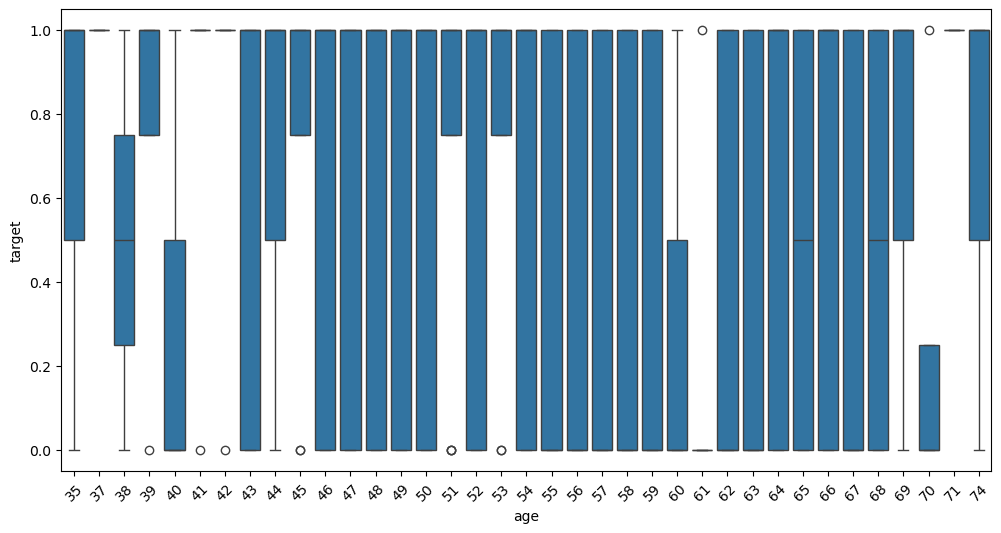

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better visualization
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='age', y='target', data=dataset)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [13]:
#for columnName in lesser:
    #dataset[columnName][dataset][columnName]<descriptive[columnName]["min"] < descriptive[columnName]["lesser"]
#for columnName in greater:
    # dataset[columnName][dataset][columnName]>descriptive[columnName]["max"] < descriptive[columnName]["greater"]

In [14]:
descriptive=pd.DataFrame(index=["Mean","Median","mode","q1:25%", "q2:50%", "q3:75%", "q4:100%","IQR","1.5rule","lesser","greater","skew","kurtosis","min","max"],columns=numeric_col)
for columnName in numeric_col:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["q3:75%"]- descriptive[columnName]["q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["lesser"]=descriptive[columnName]["q1:25%"]-descriptive[columnName]["IQR"]
    descriptive[columnName]["greater"]=descriptive[columnName]["q3:75%"]+descriptive[columnName]["IQR"]
    descriptive[columnName]["min"]=dataset[columnName].min()
    descriptive[columnName]["max"]=dataset[columnName].max()
    descriptive[columnName]["skew"]=dataset[columnName].skew()
    descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()

C:\Users\sadiq\AppData\Local\Temp\ipykernel_18976\1138731317.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\sadiq\AppData\Local\Temp\ipykernel_18976\1138731317.py:4: Fu

In [15]:
lesser = []
greater = []

for columnName in numeric_col:
    if descriptive[columnName]["min"] < descriptive[columnName]["lesser"]:
        lesser.append(columnName)
    if descriptive[columnName]["max"] > descriptive[columnName]["greater"]:
        greater.append(columnName)

In [16]:
lesser

[]

In [17]:
greater

[]

In [19]:
dataset["chol"].value_counts()

chol
338.5    11
204.0     6
197.0     6
234.0     6
269.0     5
         ..
224.0     1
167.0     1
276.0     1
290.0     1
241.0     1
Name: count, Length: 140, dtype: int64

In [20]:
def freqTable(colunName,dataset):
    freqTable=pd.DataFrame(columns=["unique_value","frequency","relative_frequency","cumsum"])
    freqTable["unique_value"]=dataset[columnName].value_counts().index
    freqTable["frequency"]=dataset[columnName].value_counts().values
    freqTable["relative_frequency"]=freqTable["frequency"]/103
    freqTable["cumsum"]=freqTable["relative_frequency"].cumsum()
    return freqTable

In [21]:
freqTable("chol",dataset)

,unique_value,frequency,relative_frequency,cumsum
0,1,164,1.592233,1.592233
1,0,138,1.339806,2.932039


In [22]:
dataset

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233.00,0,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130,250.00,0,1,187.0,0,3.2,0,0,2,1
2,2,41,0,1,130,204.00,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120,236.00,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,120,338.50,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,0,140,241.00,0,1,123.0,1,0.2,1,0,3,0
298,299,45,1,3,110,264.00,0,1,132.0,0,1.2,1,0,3,0
299,300,68,1,0,144,193.00,0,1,141.0,0,3.2,1,2,3,0
300,301,57,1,0,130,147.25,0,1,115.0,1,1.2,1,1,3,0


In [23]:
#skew and kurtosis

In [26]:
dataset["target"].kurtosis()

-1.983008230569437

In [27]:
dataset["target"].skew()

-0.17369101189529737

In [ ]:
dataset["hsc_p"].kurtosis()

In [28]:
descriptive

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Mean,54.430464,0.963576,130.837748,244.798841,0.0,0.52649,149.797185,0.327815,0.996358,1.397351,0.625828,2.321192,0.543046
Median,55.5,1.0,130.0,240.5,0.0,1.0,152.5,0.0,0.8,1.0,0.0,2.0,1.0
mode,58,0,120,338.5,0,1,162.0,0,0.0,2,0,2,1
q1:25%,48.0,0.0,120.0,211.0,0.0,0.0,133.25,0.0,0.0,1.0,0.0,2.0,0.0
q2:50%,55.5,1.0,130.0,240.5,0.0,1.0,152.5,0.0,0.8,1.0,0.0,2.0,1.0
q3:75%,61.0,2.0,140.0,274.75,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
q4:100%,74.0,3.0,160.0,338.5,0.0,2.0,198.75,1.0,3.2,2.0,2.0,3.0,1.0
IQR,13.0,2.0,20.0,63.75,0.0,1.0,32.75,1.0,1.6,1.0,1.0,1.0,1.0
1.5rule,19.5,3.0,30.0,95.625,0.0,1.5,49.125,1.5,2.4,1.5,1.5,1.5,1.5
lesser,35.0,-2.0,100.0,147.25,0.0,-1.0,100.5,-1.0,-1.6,0.0,-1.0,1.0,-1.0


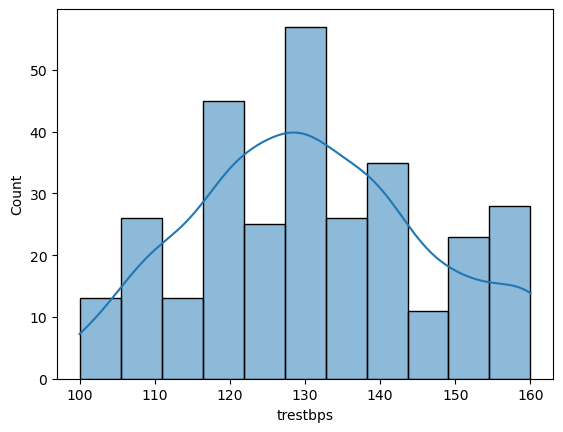

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['trestbps'], kde=True)
plt.show()